# I-94 Interstate Highway (Westbound): Analysis of heavy traffic factors

![I-94](https://s3.amazonaws.com/dq-content/524/i94_figma.png)

## Introduction

In this project, we are going to analyse the dataset about the westbound traffic on the [I-94 Interstate highway](https://en.wikipedia.org/wiki/Interstate_94).

Our goal is to determine few factors for heavy traffic, and the correlation between them.

## Dataset

Information about our dataset including CSV downloadable can be found at the [UCI Machine learning repository](https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume).

**Credits:** Thanks to John Hogue for compiling the dataset, and making it available for us.

**Note:** As per the documentation
- The traffic data was recorded by a station located approximately midway between Minneapolis and Saint Paul
- The station only records westbound traffic (cars moving from east to west)

Due to the above note on the dataset, we should avoid generalising our results for the entire I-94 highway.

## Initial Exploration

Let's now read the CSV file to examine few sample rows along with the broader information about the dataset.

In [225]:
import pandas as pd
traffic = pd.read_csv("Metro_Interstate_Traffic_Volume.csv")
traffic

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918
...,...,...,...,...,...,...,...,...,...
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450


In [226]:
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


## Exploratory Data Analysis - Time factors

### Traffic volume: Day time vs Night time

Now that we understand a bit more about the dataset columns, we will see the distribution of the `traffic_volume` column.

In [227]:
traffic["traffic_volume"].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

From the distribution of the `traffic_volume` data, we can see that:
- About 25% of the time, there are **1193** cars or fewer passing the station each hour
- About 25% of the time, there is a 4 times as much traffic volume (**4933** cars or more)

This signifies that potentially there are factors such as time of the day (Day or Night hours), holidays or road maintenance/construction in play here.

Since we have the date and hourly window when the data was recorded, it would be interesting next to look at the variation based on hour window.

In [228]:
traffic["date_time"] = pd.to_datetime(traffic["date_time"])
# Extracting the hour and storing it as a seperate column
traffic["hour"] = traffic["date_time"].dt.hour
# Extracting the month and day of the week - Storing it as a seperate columns for later
traffic["month"] = traffic["date_time"].dt.month
traffic["day_of_week"] = traffic["date_time"].dt.dayofweek
traffic["day"] = traffic["date_time"].dt.day
traffic["year"] = traffic["date_time"].dt.year

day_time_traffic = traffic[traffic["hour"].between(6,19)]
night_time_traffic = traffic[(traffic["hour"] < 6) | (traffic["hour"] > 19)]

Above, we have seperated the hour part from the `date_time` as a seperate column, and also divided the dataset into two parts:
- Daytime data: hours from 6 am to 7 pm
- Nightime data: hours from 7 pm to 6 am

Now we will use the divided dataset to plot the traffic volume frequency side-by-side.

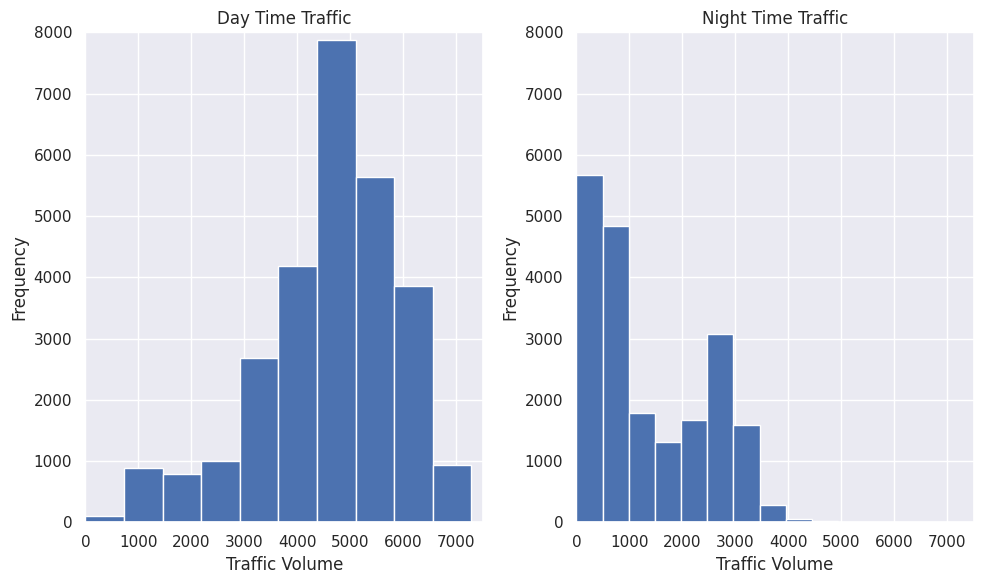

Statistics: Day time traffic
count    27925.000000
mean      4611.267574
std       1294.808371
min          0.000000
25%       3992.000000
50%       4761.000000
75%       5521.000000
max       7280.000000
Name: traffic_volume, dtype: float64


Statistics: Night time traffic
count    20279.000000
mean      1398.818334
std       1047.170978
min          0.000000
25%        441.000000
50%        929.000000
75%       2456.000000
max       4939.000000
Name: traffic_volume, dtype: float64


In [229]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
sns.set(style = "darkgrid") #To have better theme for grid display

plt.figure(figsize=(10,6))

# Subplot for day time traffic (6 am to 7 pm)
plt.subplot(1,2,1)
plt.title("Day Time Traffic")
plt.ylim([0, 8000])
plt.xlim([0, 7500])
plt.xlabel("Traffic Volume")
plt.ylabel("Frequency")
plt.tight_layout() #To ensure labels don't overlap
day_time_traffic["traffic_volume"].plot.hist()

# Subplot for night time traffic (7 pm to 6 am)
plt.subplot(1,2,2)
plt.title("Night Time Traffic")
plt.ylim([0, 8000])
plt.xlim([0, 7500])
plt.xlabel("Traffic Volume")
plt.ylabel("Frequency")
plt.tight_layout() #To ensure labels don't overlap
night_time_traffic["traffic_volume"].plot.hist()

plt.show()

# Describe the two dataset traffic volume series
print('Statistics: Day time traffic')
print('='*len('Statistics: Day time traffic'))
print(day_time_traffic["traffic_volume"].describe())
print('\n')
print('Statistics: Night time traffic')
print('='*len('Statistics: Night time traffic'))
print(night_time_traffic["traffic_volume"].describe())

From the histogram, and statistics on the *Day time vs Night time* traffic volume - We can infer:
1. Histogram for the day time hours seem to have a slight skew from a symmetric distribution
2. Histogram for the night time hours seem to have a random distribution
3. Average day time traffic volume (**4611 cars**) is much higher (3 times) than night time (**1398 cars**)
4. Oddly, during the night time hours, the maximum number of cars seem to have hit a high of 4939 cars at some point (But this might be an outlier)

Considering our goal to find indicators of heavy traffic, going forward we will only proceed with our day time only dataset.

Next, we will look at one such possible indicators - Time. There might be more people on the road in a certain month, on a certain day, or at a certain time of the day.

We will start our analysis of traffic volume in relation to the certain month.

**Note:** When we extracted the hour, we also extracted the month and day of the week part of the `date_time` and stored in `month` and `day_of_week` columns respectively.

### Average Traffic volume: By Month

We will use our `month` column that we had already created from `date_time` to group by and calculate averages.

In [230]:
# Group by month and calculate averages for all numeric columns
by_month = day_time_traffic.groupby('month').mean()
# Show the averages grouped by month
by_month

,temp,rain_1h,snow_1h,clouds_all,traffic_volume,hour,day_of_week,day,year
month,,,,,,,,,
1,265.267536,0.014556,0.000545,57.604933,4354.506274,12.376893,2.877975,15.727823,2015.771095
2,266.356072,0.003843,0.000000,50.849654,4561.668150,12.384768,2.914936,14.489614,2015.671118
3,273.438491,0.017853,0.000000,56.565138,4697.060550,12.352294,3.061009,16.403211,2015.727523
4,279.456943,0.098661,0.000000,59.478029,4733.964271,12.501437,3.011910,15.446817,2015.673511
5,289.065720,0.124830,0.000000,55.594814,4754.816176,12.481424,2.869582,16.289087,2015.575077
6,294.316698,0.288086,0.000000,47.834234,4750.101802,12.381081,3.073874,15.303604,2015.854054
7,296.482285,3.838574,0.000000,40.813218,4466.139009,12.339080,3.028017,15.865661,2015.608477
8,294.816310,0.229472,0.000000,41.743297,4782.513801,12.332413,2.993691,15.768533,2015.966088
9,292.261089,0.311384,0.000000,45.024201,4719.379909,12.419178,2.915525,15.373059,2016.156164


Having our averages grouped by month, let's now visualise how the average traffic volume changed each month.

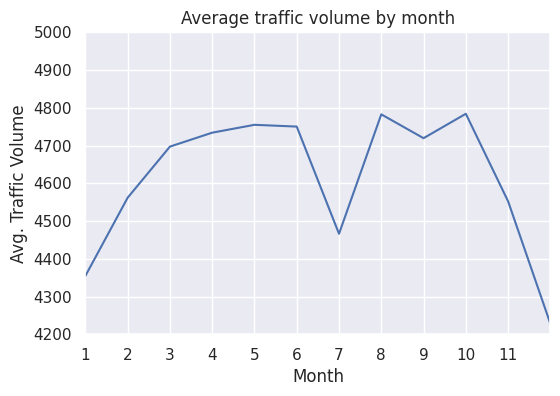

In [231]:
by_month['traffic_volume'].plot.line(x="month", y="traffic_volume")
plt.title("Average traffic volume by month")
plt.xlabel('Month')
plt.ylabel('Avg. Traffic Volume')
plt.xlim([1,12])
# Setting ticks so we can clearly see the movement per month
plt.xticks(np.arange(1,12,step=1))
plt.ylim([4200,5000])
plt.show()

Looking at the line plot above - Few interesting patterns we can observe on the average traffic volume:
1. It gradually raises from January till June and drops gradually from October to December
2. Traffic volume seem higher during the warm months (March - October) compared to cold months (November - February)
3. Only exception during warm months is a sharp drop in July - It is worth investigating if it's reoccurance in all years (such as summer school holidays) or a true outlier (some exception occuring in a particular year).

It seems that warmer months have higher traffic volume than cold months, potentially, the effects of year-end holiday season (Thanksgiving and Christmas).

### Exception Analysis: Huge Drop in July

During the warmer months, there is an exception that the average traffic volume dropped significantly. We will pull data for July across years to see if there is a level of consistency or a true outlier.



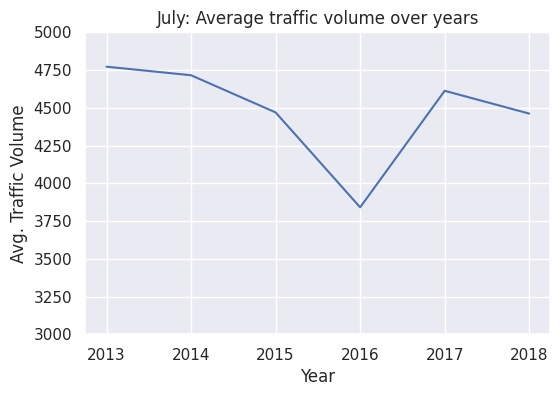

In [232]:
# Seperate only July data and then group by year to get the averages for that month across years
by_july = day_time_traffic[day_time_traffic["month"] == 7].groupby('year').mean()
# Line plot by year for average traffiv volume
by_july['traffic_volume'].plot.line(x="year", y="traffic_volume")
plt.title("July: Average traffic volume over years")
plt.xlabel('Year')
plt.ylabel('Avg. Traffic Volume')
plt.ylim([3000,5000])
plt.show()

From this analysis, it seems that July significant drop happened only in 2016, and seems like an outlier rather than sasonal reoccurance over years.

A quick [google](https://www.google.com/search?q=July+2016+I-94+events&sxsrf=APq-WBvFs94PPmIMzD_1RmjcwyRuVrqYNA%3A1646245545704&source=hp&ei=qbYfYvzlJ9KsgQb-r6noCg&iflsig=AHkkrS4AAAAAYh_Euaph9jRom4Ei20l0nAqKeD6lyV1o&ved=0ahUKEwi83tjHhqj2AhVSVsAKHf5XCq0Q4dUDCAg&uact=5&oq=July+2016+I-94+events&gs_lcp=Cgdnd3Mtd2l6EAM6DgguEIAEELEDEMcBENEDOgsIABCABBCxAxCDAToLCC4QgAQQsQMQgwE6CAguEIAEELEDOhEILhCABBCxAxCDARDHARDRAzoFCC4QgAQ6CAgAEIAEELEDOgUIABCABDoICC4QgAQQ1AI6BQgAELEDOggIABCABBDJAzoGCAAQFhAeOgUIIRCgAVAAWIknYLwoaABwAHgAgAGDBIgB_B-SAQs1LjguMi4xLjIuMpgBAKABAQ&sclient=gws-wiz) using "July 2016 I-94" shows Black life matter protests - Resulting conflict with the police caused shut down of the free way for large part of the weekend.

In particular, the protest for the [shooting](https://www.startribune.com/marchers-block-i-94-to-westbound-traffic/386158771/) of Philando Castile (July 6, 2016) happened on weekend (9-10th July, 2016).

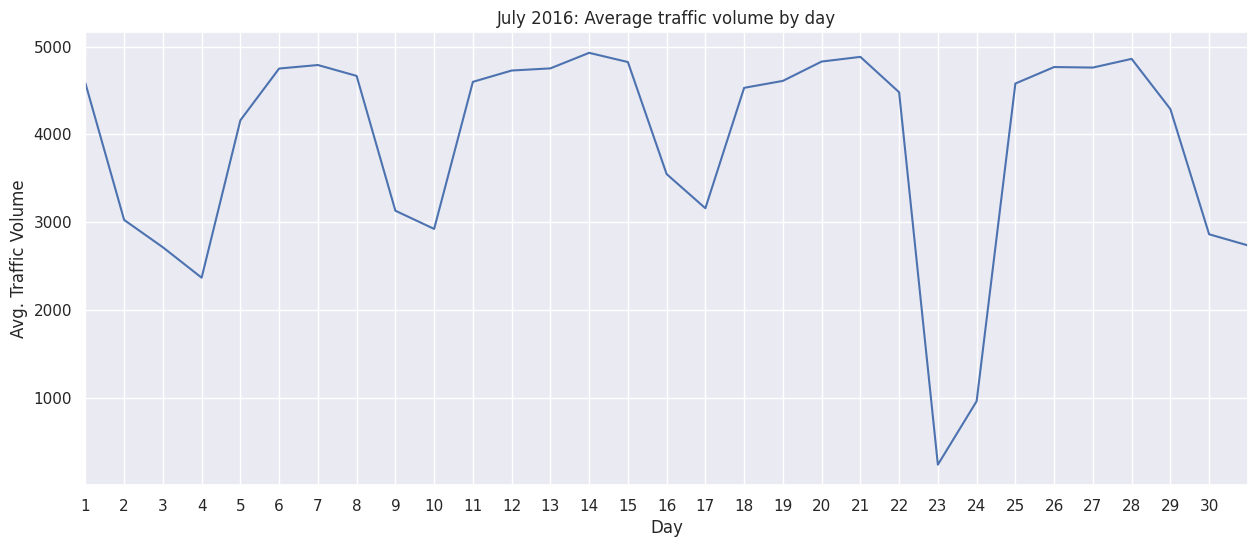

In [233]:
by_day_july_2016 = day_time_traffic[(day_time_traffic["month"] == 7) & (day_time_traffic["year"] == 2016)].groupby('day').mean()
by_day_july_2016['traffic_volume'].plot.line(x="day", y="traffic_volume", figsize=(15,6))
plt.title("July 2016: Average traffic volume by day")
plt.xlabel('Day')
plt.ylabel('Avg. Traffic Volume')
plt.xlim([1,31])
plt.xticks(np.arange(1,31,step=1))
plt.show()

However, when plotting the average traffic volume against each day for July, 2016 - We see a significant drop on the weekend of 23-24th July.

This probably might be linked to the protest closure, but dataset might have an incorrect date?

Either way we can assume that exception for July was an outlier due one particular year.

Next, we will look at the average traffic volume for each day of the week.

### Average Traffic volume: By day of the week

We will use our `day_of_week` column that we had already created from `date_time` to group by and calculate averages.

**Note:** Day of the week is a range from 0 (Monday) through 6 (Sunday).

In [234]:
# Group by day of the week and calculate averages for all numeric columns
by_dayofweek = day_time_traffic.groupby('day_of_week').mean()
# Show the averages grouped by day of the week
by_dayofweek # 0 is Monday, 6 is Sunday

,temp,rain_1h,snow_1h,clouds_all,traffic_volume,hour,month,day,year
day_of_week,,,,,,,,,
0,282.126012,2.536164,0.000015,56.566723,4771.066360,12.482926,6.395495,15.337128,2015.528215
1,282.068457,0.144639,0.000191,52.259240,5071.712720,12.341066,6.466225,15.605149,2015.581188
2,282.020898,0.061704,0.000935,52.758020,5171.716737,12.405123,6.622979,15.993534,2015.497140
3,282.121619,0.181953,0.000127,53.279605,5187.552885,12.452429,6.514676,15.878289,2015.490385
4,281.884306,0.093327,0.000192,50.770397,5164.136903,12.441526,6.562263,15.962364,2015.505431
5,282.080936,0.102685,0.000081,49.643327,3697.681496,12.390546,6.502781,15.600101,2015.527300
6,282.034226,0.151365,0.000000,51.798243,3213.063237,12.367378,6.595232,15.634630,2015.447930


Having averages grouped by day of the week; let's now visualise how the average traffic volume by it.

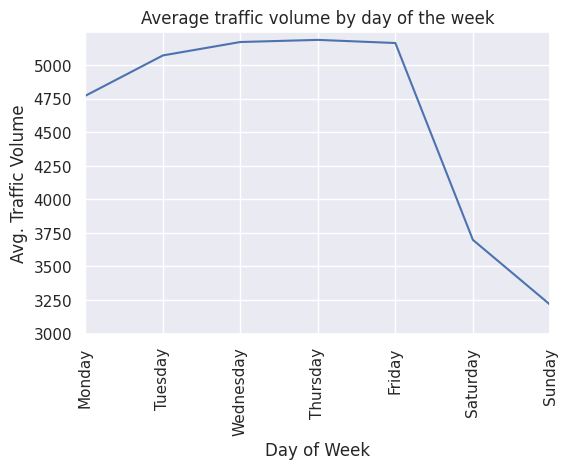

In [235]:
by_dayofweek['traffic_volume'].plot.line(x="day_of_week", y="traffic_volume")
plt.title("Average traffic volume by day of the week")
plt.xlabel('Day of Week')
plt.ylabel('Avg. Traffic Volume')
plt.xlim([0,6])
# Setting ticks so we see the days rather than numbers
day_of_week_labels = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
plt.xticks(np.arange(0,7,step=1), labels=day_of_week_labels,rotation=90)
plt.ylim([3000,5250])
plt.yticks(np.arange(3000,5250,step=250))
plt.show()

As per the plot above, we can see that during the business days (Monday to Friday) the average traffic volume is significantly high, and sharply reducing during the weekends (Saturday and Sunday).

Next, we will look at the average traffic volume based on time of the day. For this, we will seperate the business days (Monday to Friday) from weekends (Saturday and Sunday).

### Average traffic volume: By time of the day

We will use our `hour` column in combination with `day_of_week` column that we had already created from `date_time` to calculate averages.

In [236]:
# Seperate weekend and business days from overall day time traffic 
business_days = day_time_traffic.copy()[day_time_traffic["day_of_week"] <= 4]
weekend = day_time_traffic.copy()[day_time_traffic["day_of_week"] >= 5]
by_hour_business = business_days.groupby("hour").mean()
by_hour_weekend = weekend.groupby("hour").mean()
by_hour_business

,temp,rain_1h,snow_1h,clouds_all,traffic_volume,month,day_of_week,day,year
hour,,,,,,,,,
6,278.432872,0.164433,0.000067,45.685695,5365.983210,6.573539,1.997314,16.005373,2015.558093
7,278.662639,0.145105,0.000068,50.538983,6030.413559,6.363390,1.984407,15.810847,2015.562712
8,278.938443,0.144614,0.000135,53.666441,5503.497970,6.567659,1.989175,15.889716,2015.493234
9,279.628421,0.156829,0.000139,53.619709,4895.269257,6.484386,1.981263,15.701596,2015.548924
10,280.664650,0.113984,0.000033,54.781417,4378.419118,6.481283,1.957888,16.094251,2015.526738
11,281.850231,0.151976,0.000000,52.808876,4633.419470,6.448819,1.979957,15.682176,2015.528275
12,282.832763,0.090271,0.001543,53.855714,4855.382143,6.569286,1.989286,15.764286,2015.550000
13,283.292447,0.092433,0.000370,53.325444,4859.180473,6.465237,1.982988,15.656065,2015.514053
14,284.091787,0.102991,0.000746,55.326531,5152.995778,6.588318,1.990852,15.683322,2015.501056


In [237]:
by_hour_weekend

,temp,rain_1h,snow_1h,clouds_all,traffic_volume,month,day_of_week,day,year
hour,,,,,,,,,
6,278.115656,0.270134,0.000000,44.491639,1089.100334,6.533445,5.521739,15.884615,2015.498328
7,278.095331,0.291540,0.000000,50.006623,1589.365894,6.518212,5.501656,15.970199,2015.442053
8,277.981017,0.083870,0.000083,48.877076,2338.578073,6.523256,5.503322,15.734219,2015.471761
9,279.785660,0.075234,0.000364,49.688042,3111.623917,6.603120,5.492201,15.519931,2015.495667
10,280.403811,0.079674,0.000103,48.915808,3686.632302,6.491409,5.503436,16.039519,2015.458763
11,282.129355,0.141387,0.000000,52.372973,4044.154955,6.482883,5.491892,15.544144,2015.549550
12,282.936119,0.095784,0.000000,51.418018,4372.482883,6.500901,5.493694,15.353153,2015.495495
13,283.784951,0.180452,0.000000,53.095841,4362.296564,6.580470,5.497288,15.493671,2015.508137
14,284.663261,0.087847,0.000000,52.735401,4358.543796,6.644161,5.500000,15.594891,2015.474453


We will now visualise average traffic volume by time of the day comparing business days to weekends.

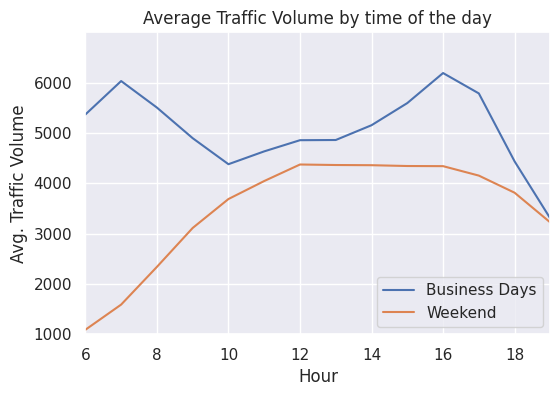

In [238]:
# Line plot of weekend and busines days with the same x and y-axes scales for comparision
by_hour_business['traffic_volume'].plot(x="hour", y="traffic_volume", label="Business Days")
by_hour_weekend['traffic_volume'].plot(x="hour", y="traffic_volume", label="Weekend")

# Graph visual context setting
plt.title("Average Traffic Volume by time of the day")
plt.xlabel('Hour')
plt.ylabel('Avg. Traffic Volume')

# Ensure x and y axes ticks are spread for presentability
plt.xlim([6,19])
plt.xticks(np.arange(6,19,step=2))
plt.ylim([1000,7000])
plt.yticks(np.arange(1000,7000,step=1000))
plt.legend() #Display legend for Business Days vs Weekend
plt.show()

By comparing the average traffic volumes across time of the day for both business days and weekends side by side - We can note the following:

During business days the average traffic volume across all hours seem higher compared to the weekends and this is significant during the peaks.

**During Business Days**
1. Traffic volume gradually increases from 6.00 am reaching peak at 7.00 am and then gradually reducing - So busy period seem to be between 6 am - 8 am with peak rush around **7.00 am**
2. Similarly, we see during the evening, traffic volume gradually increases from 3.00 am reaching peak at 4.00 pm (16:00 hours) and then gradually reducing - So busy period seem to be between 3.00 pm - 5.00 pm with peak rush around **4.00 pm**

**During Weekends**
1. Traffic volume gradually increases from 9 AM reaching maximum about mid-day
2. Between **mid-day and 4 pm** - Traffic volume pretty much stays consistently at the maximum
3. A slow decline in traffic volume starts from 5 PM

### Summary: Time indicators for heavy traffic

- Traffic usually heavier during warm months (March-Oct) compared to cold months (Nov - Feb)
- Traffic is heavier during business days than weekends
- On business days, the peak rush are around 7 am and 4 pm
- On weekends, the peak rush is between mid-day and 4 pm

## Exploratory Analysis - Weather Factors

Another possible indicator of heavy traffic is weather. In our dataset, we have the related columns:
- `temp`
- `rain_1h`
- `snow_1h`
- `clouds_all`
- `weather_main`
- `weather_description`.

### Traffic Volume Correlation: Numeric columns

We will look at the numeric columns among the above and it's correlation to `traffic_volume`.

In [239]:
# Get Persons R for traffic volume against numeric columns, but ignore all time related numeric columns
day_time_traffic.corr()["traffic_volume"].drop(["traffic_volume","hour","month","day_of_week", "year"])

temp          0.117139
rain_1h       0.003612
snow_1h       0.003786
clouds_all   -0.024714
day          -0.009218
Name: traffic_volume, dtype: float64

We see `temp` column most coorelated to `traffic_volume` amongst other numeric weather columns. So, let's visualise the correlation through a scatter plot.

Text(0.5, 1.0, 'Temperature vs Traffic Volume')

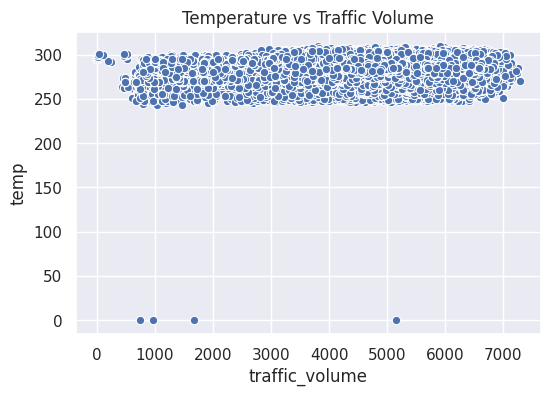

In [240]:
sns.scatterplot(data=day_time_traffic, x="traffic_volume", y="temp")
plt.title("Temperature vs Traffic Volume")

From the above analysis, it's clear that none of the numeric weather columns have any clear relation to the traffic volume.

### Traffic Volume correlation: Categorical columns

We will now at the categorical weather columns `weather_main` and `weather_description` and it's relationship with `traffic_volume` (if any).

Since these are categorical columns, we will first calculate the averages by grouping with these columns.

In [241]:
by_weather_main = day_time_traffic.groupby("weather_main").mean()
by_weather_desc = day_time_traffic.groupby("weather_description").mean()

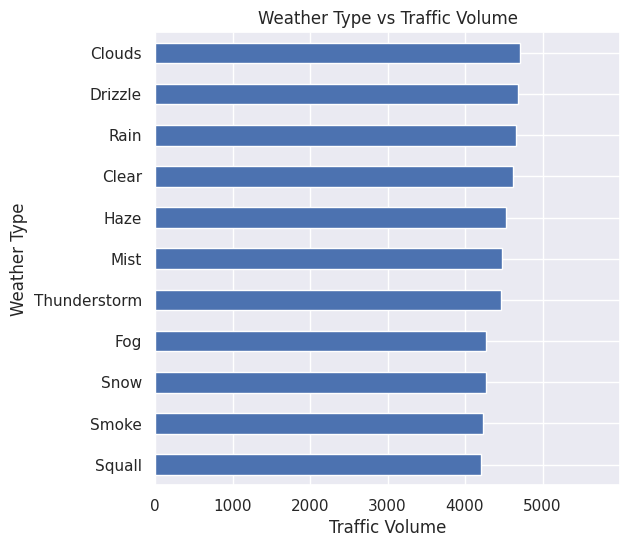

In [244]:
# Sort and plot so that we can clearly see the top indicator for heavy traffic
by_weather_main['traffic_volume'].sort_values().plot.barh(x="weather_main", y="traffic_volume", figsize=(6,6))
plt.xlabel("Traffic Volume")
plt.ylabel("Weather Type")
plt.xlim([0,6000])
plt.xticks(np.arange(0,6000,step=1000))
plt.title('Weather Type vs Traffic Volume')
plt.show()

From the analysis and plot above, we see that none of the weather main types have any siginificant impact on the traffic volumes.

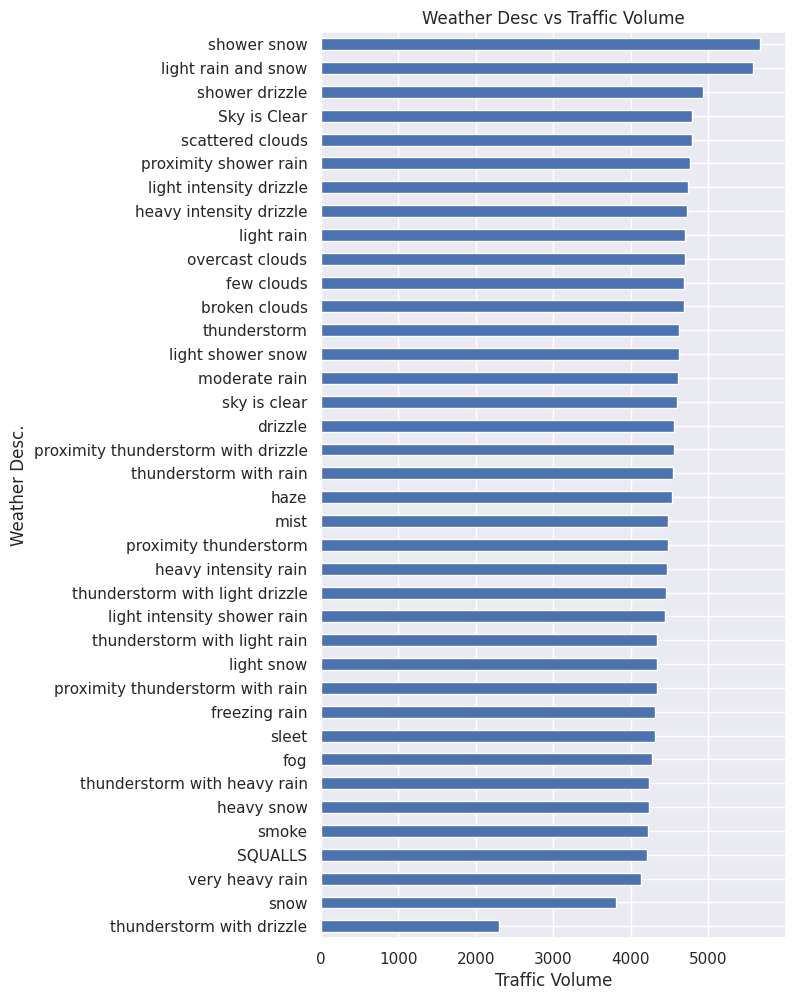

In [245]:
# Sort and plot so that we can clearly see the top indicator for heavy traffic
by_weather_desc['traffic_volume'].sort_values().plot.barh(x="by_weather_desc", y="traffic_volume", figsize=(6,12))
plt.xlabel("Traffic Volume")
plt.ylabel("Weather Desc.")
plt.title('Weather Desc vs Traffic Volume')
plt.xlim([0,6000])
plt.xticks(np.arange(0,6000,step=1000))
plt.show()

From the plot above, we can see <mark>shower snow</mark>, <mark>light rain and snow</mark>, and <mark>shower drizzle</mark> seem to be the conditions that cause traffic of more than 5000 vehicles.

## Conclusion

In this project, we tried to find a few indicators of heavy traffic on the I-94 Interstate highway. We managed to find two types of indicators:

- Time indicators
    - The traffic is usually heavier during warm months (March–October) compared to cold months (November–February)
    - The traffic is usually heavier on business days compared to the weekends
    - On business days, the rush hours are around 7 am and 4 pm
    
    
- Weather indicators
    - Shower snow
    - Light rain and snow
    - Shower drizzle